# Teks Klasifikasi Gender

Oleh Fikri Rozan Imadudin/ 1301150768, Riko Bintang Purnomo Putra /1301154714, Jeqwalin Claudya Patandianan /1301150737

# Inisialisasi

In [19]:
#inisialisasi
import pandas as pd 
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics	
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline  
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [2]:
def preprocessing(data): #fungsi preprocessing
    stop_words = stopwords.words('Indonesian') #stopword bahasa indonesia
    data["Komentar"] = data["Komentar"].str.lower() #casefolding
    data['Komentar'] = data.Komentar.str.replace("[^\w\s]", "") #punctuation removal
    data.Komentar = data.Komentar.replace('\d+', '', regex = True) #number removal
    data.Komentar = data.Komentar.replace('posts','', regex = True)
    data.Komentar = data.Komentar.replace('kaskus','', regex = True)
    data.Komentar = data.Komentar.replace('addict','', regex = True)
    data.Komentar = data.Komentar.replace('kaskuser','', regex = True)
    data.Komentar = data.Komentar.replace('maniac','', regex = True)
    data.Komentar = data.Komentar.replace('holic','', regex = True)
    data['Komentar'] = data['Komentar'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))#stopword removal
    return data

# Memasukan data
Kami menggunakan pandas sebagai library untuk memasukan dataset

In [3]:
# Input Data 
df = pd.read_csv("komentar kaskus gender.csv",encoding='latin1')#baca data training
df.tail(10)

,Komentar,Gender
95,becaksalto\n08-07-2016 16:32\nKaskus Addict\nP...,pria
96,faizhabbi\n08-07-2016 06:31\nKaskus Addict\nPo...,pria
97,bartsimpson\n08-07-2016 06:24\nKaskus Addict\n...,pria
98,dscreamer\n07-03-2014 16:56\nKaskus Addict\nPo...,pria
99,de.la.valliere\n09-09-2016 08:10\nAktivis Kask...,wanita
100,ichairmanita28\n20-01-2017 18:41\nKaskus Mania...,wanita
101,klopca123\n07-08-2017 07:36\nKaskuser\nPosts: ...,wanita
102,delia.adel \n11-03-2019 13:53\nKASKUS Plus\nPo...,wanita
103,zhangsunyu\n14-03-2019 02:18\nKaskuser\nPosts:...,wanita
104,andita2623\n05-10-2013 15:41\nKaskus Addict\nP...,wanita


# Cleaning data dan Menghapus StopWord
Pada tahap ini akan dilakukan penghapusan angka, merubah huruf besar menjadi huruf kecil, menghapus tanda baca dan menghapus kalimat-kalimat yang sering muncul seperti kata sambung

In [4]:
df = preprocessing(df)#preprocessing data training

# Kata yang sering muncul berdasarkan Gender
Kita akan melihat kata apa yang sering muncul di dalam corpus berdasarkan Gender pria atau wanita 

In [5]:
df.Gender.value_counts()

wanita    55
pria      50
Name: Gender, dtype: int64

In [6]:
pria = df[df['Gender'] == 'pria']
wanita = df[df['Gender'] == 'wanita']
pria_words = pd.Series(' '.join(pria['Komentar'].astype(str)).lower().split(" ")).value_counts()[:20]
wanita_words = pd.Series(' '.join(wanita['Komentar'].astype(str)).lower().split(" ")).value_counts()[:20]

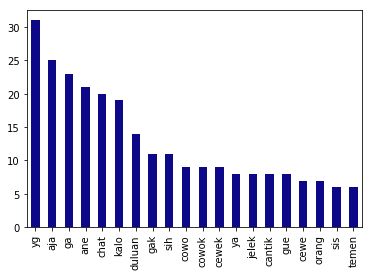

In [7]:
pria_words.plot(kind='bar',stacked=True, colormap='plasma')

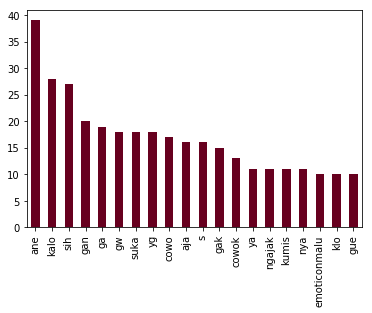

In [8]:
wanita_words.plot(kind='bar',stacked=True, colormap='RdGy')

In [9]:
x = df.iloc[:,0]#ambil berdasarkan kolom komentar
y = df.iloc[:,1]#ambil berdasarkan kolom gender
x.head(10)

0    wiandra ribet kakel mah samperin aja langsung ...
1    momogu kalo gw sih tergantung yg ngajak duluan...
2    sabrinesophia newbie kalo ngerasa cowok ya bay...
3    runarunarun pas pdkt ane nya sih maunya ditrak...
4    andraolivia geek bayar sendirisendiri makan se...
5    pachysandra ane sih demen pewangi pakaian ye g...
6    dekyomoss cowo cool ngomong tetep becandacuman...
7    aokichaâº cowo cool tuh serubisa bikin gw pena...
8    sefrilâº cowo cool yg cuek gak peduli ama ling...
9    lalalola kadang cowok dingin bikin cewek melel...
Name: Komentar, dtype: object

# Mengonversi kumpulan dokumen teks ke matriks jumlah token

In [10]:
vectorizer = CountVectorizer()#panggil fungsi countvector
X = vectorizer.fit_transform(x)#fit countvector pada kolom komentar training

In [11]:
dt = pd.read_csv("komentar kaskus gender test.csv")#baca data testing
#dt = preprocessing(dt)# #preprocessing data testing

In [12]:
x_train = X #alokasi variable xtraining (komentar training)
y_train = y #alokasi variable ytraining (gender training)
x_test = dt.iloc[:,0]#ambil berdasarkan kolom komentar
y_test = dt.iloc[:,1]#ambil berdasarkan kolom gender
x_test = vectorizer.transform(x_test)#fit countvector pada kolom komentar testing

# Klasifikasi Menggunakan MNNB

In [24]:
clf = MultinomialNB()#panggil fungsi Mutinomial naive bayes
clf.fit(x_train,y_train)#fit fungsi MNNB pada x_train dan y_train
predict=clf.predict(x_test) #prediksi dengan MNNB
scoremnnb=clf.score(x_train,y_train) #skor dengan MNNB
print("Akurasi Prediksi  MNNB:",metrics.accuracy_score(y_test, predict)*100,'%') #print hasil akurasi MNNB


Akurasi Prediksi  MNNB: 85.71428571428571 %


In [25]:
from sklearn import metrics
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

        pria       0.86      0.86      0.86         7
      wanita       0.86      0.86      0.86         7

   micro avg       0.86      0.86      0.86        14
   macro avg       0.86      0.86      0.86        14
weighted avg       0.86      0.86      0.86        14



# Klasifikasi Menggunakan Bagging MNNB

In [15]:
clf2 = BaggingClassifier(base_estimator=clf, n_estimators=100, random_state=10)#panggil fungsi bagging dengan MNNB sebagai base_estimator
clf2.fit(x_train,y_train)#fit fungsi bagging pada x_train dan y_train
predict2=clf2.predict(x_test)#prediksi MNNB dengan bagging
bagging = np.array(predict2.tolist())#kolom gender hasil prediksi
scorebagging=clf2.score(x_train,y_train)#skor MNNB dengan bagging
print("Akurasi Prediksi  MNNB dengan Bagging:",metrics.accuracy_score(y_test, predict2)*100,'%')#print hasil akurasi MNNB dengan bagging

Akurasi Prediksi  MNNB dengan Bagging: 92.85714285714286 %


In [16]:
from sklearn import metrics
print(metrics.classification_report(y_test, predict2))

              precision    recall  f1-score   support

        pria       0.88      1.00      0.93         7
      wanita       1.00      0.86      0.92         7

   micro avg       0.93      0.93      0.93        14
   macro avg       0.94      0.93      0.93        14
weighted avg       0.94      0.93      0.93        14

